In [3]:
# In this code block we are importing all the essential libraries which we will use in our solving tasks

import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
import numpy as np
from sklearn import preprocessing
from sklearn.manifold import TSNE
from numpy import rec
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn .preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

url = "/content/drive/MyDrive/Dry_Bean_Dataset.xlsx"
df = pd.read_excel(url)  # reading data with the help of panda library

Part A

In [ ]:
sns.displot(df["Class"],stat = 'density',height=6, aspect=11.7/8.27)  # for ploting the distribution of data with the density of each class

Part B

In [ ]:
df.isnull().sum()   # this will helps us to seeing whether there is any column which contains null value

In [ ]:
df.describe()  # this will describe our data by some statiscal parameters such as mean, standard deviation, etc.

In [ ]:
sns.pairplot(df,hue='Class') # this will plot the graph between each of the paramters we have and classify the class distrubution 

In [ ]:
sns.scatterplot(data=df,hue = "Class",x = "MinorAxisLength",y = "ShapeFactor1")  # this will plot scatter plot between MinorAxisLength and ShapeFactor1

In [ ]:
sns.scatterplot(data=df,hue = "Class",x = "MajorAxisLength",y="Extent") # this will also plot scatter plot between MajorAxisLength and Extent

In [ ]:
sns.boxplot(data=df,x = "Area") # this will help us to visualise the outliers in Area data

In [ ]:
sns.boxplot(data=df,x = "ShapeFactor4") # this will help us to visualise the outliers in ShapeFactor4 data

In [ ]:
sns.boxplot(data=df,x = "ConvexArea") # this will help us to visualise the outliers in ConvexArea data

In [ ]:
sns.histplot(x = "Area",y = "ConvexArea",data=df,hue = "Class")  # this will plot the histogram between Area and ConvexArea

Part C

In [ ]:
df1 = df.iloc[:,0:-1]
tsne = TSNE().fit_transform(df1)  # In this command tsne transform the real data into two parameters
df_copy = df.copy()  # this will helps us in copying the data of any dataframe
df_copy['tsneone'] = tsne[:,0]
df_copy['tsnetwo'] = tsne[:,1]

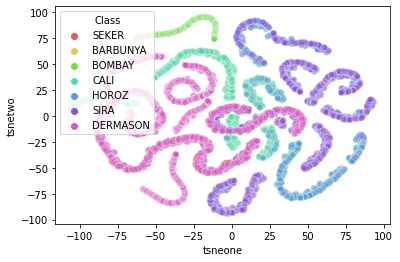

In [ ]:
sns.scatterplot(data=df_copy,x = df_copy["tsneone"],y = df_copy["tsnetwo"],hue = "Class",palette=sns.color_palette("hls", 7),alpha=0.3,legend = "full")  # this will plot the scatterplot for visualsing tsne's transformed distribution 

Part D

Gaussian Model

In [ ]:
# In this Code block we are implementing GaussianNB naive bayes Model 

X = df.iloc[:,0:-1].values
Y = df.iloc[:,-1].values
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0) # spliting the data for training and testing
sc = StandardScaler()  # initialistion of standard scaler type object
sc.fit(X_train) # normalisation of features for improving performance
X_train_std = sc.transform(X_train) # changes the original x train data
X_test_std = sc.transform(X_test) # changes the original y train data
Gaussian = GaussianNB()  # initalisation of model
Gaussian.fit(X_train_std, Y_train) # training the model
Y_pred = Gaussian.predict(X_test_std) # testing our trained model
recall1 = recall_score(Y_pred,Y_test,average = "micro")  # calculating recall score for GaussianNB naive bayes model 
precision = precision_score(Y_pred,Y_test,average = "micro") # calculating precision score for GaussianNB naive bayes model 
accuracy = accuracy_score(Y_pred,Y_test) # calculating accuracy score for GaussianNB naive bayes model 
print("Recall = "+str(recall1))
print("Precision = "+str(precision))
print("Accuracy = "+str(accuracy))

Bernoulli Model

In [ ]:
# In this Code block we are implementing BernoulliNB naive bayes Model 

Bernoulli = BernoulliNB()  # initalisation of model
Bernoulli.fit(X_train_std,Y_train)  # training the model
Y_pred = Bernoulli.predict(X_test_std) # testing our trained model
recall = recall_score(Y_pred,Y_test,average = "micro")  # calculating recall score for BernoulliNB naive bayes model
precision = precision_score(Y_pred,Y_test,average = "micro") # calculating precision score for BernoulliNB naive bayes model
accuracy = accuracy_score(Y_pred,Y_test) # calculating accuracy score for BernoulliNB naive bayes model
print("Recall = "+str(recall))
print("Precision = "+str(precision))
print("Accuracy = "+str(accuracy))

Part E

In [ ]:
# In this part we are using PCA for reducing the features from the data

n = 4
for i in range(5): # initalisation of model
  gauss = GaussianNB()  
  pca = PCA(n_components=n) # pca object intialisation with number of component = n
  X_train_pca = pca.fit_transform(X_train_std)  # transform the normalised x train data with the help of pca
  X_test_pca = pca.transform(X_test_std)  # transform the normalised x test data with the help of pca
  gauss.fit(X_train_pca,Y_train) # training the model
  Y_pred = gauss.predict(X_test_pca) # testing our trained model
  recall = recall_score(Y_pred,Y_test,average = "micro") # calculating recall score after using PCA for GaussianNB naive bayes model
  precision = precision_score(Y_pred,Y_test,average = "micro") # calculating precision score after using PCA for GaussianNB naive bayes model
  F1_score = f1_score(Y_pred,Y_test,average="micro") # calculating F1 score after using PCA for GaussianNB naive bayes model
  accuracy = accuracy_score(Y_pred,Y_test) # calculating accuracy score after using PCA for GaussianNB naive bayes model
  print("Accuracy for PCA with number of components " + str(n) + " = " +str(accuracy))
  print("Recall for PCA with number of components " + str(n) + " = " +str(recall))
  print("Precision for PCA with number of components " + str(n) + " = " +str(precision))
  print("F1 score for PCA with number of components "+str(n)+ " = "+str(F1_score))
  print()
  n += 2

Part F

Plotting ROC And AUC Curve

With PCA

In [ ]:
# In this code block we will use PCA and plot roc auc curve. In this we will do same type of operation like
# we are initialising pca object then transform our data 
# then we will train on model and then test of that model
# then in the end we will plot roc curve with couting the auc values.

# with PCA
pca1 = PCA(n_components = 8) 
X = df.iloc[:,0:-1].values
sc = StandardScaler()
X = sc.fit_transform(X)
X = pca1.fit_transform(X)
Y = df.iloc[:,-1].values
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 0)
model = GaussianNB()
model.fit(xtrain,ytrain)
label = OneHotEncoder()
label.fit(ytest.reshape(-1,1))
ytest = label.transform(ytest.reshape(-1,1)).toarray()
y_pred = model.predict_proba(xtest)
classunique = df["Class"].unique()
for i in range(7):  
  fpr, tpr, _ = roc_curve(ytest[:,i],y_pred[:,i])
  auc = round(roc_auc_score(ytest[:,i], y_pred[:,i]), 4)
  plot.plot(fpr,tpr,label = classunique[i]+", "+"auc = "+str(auc))
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.title("ROC-AUC with PCA")
plot.legend()

Without PCA

In [ ]:
# In this code block we will do the same kind of operation which we done in ploting roc auc curve with pca but in this we are not using pca
# we are direclty do other operations and plot the roc-auc curve and report it by using matplotlib 

X = df.iloc[:,0:-1].values
Y = df.iloc[:,-1].values
sc = StandardScaler()
X = sc.fit_transform(X)
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.2,random_state = 0)
model = GaussianNB()
model.fit(xtrain,ytrain)
label = OneHotEncoder()
label.fit(ytest.reshape(-1,1))
ytest = label.transform(ytest.reshape(-1,1)).toarray()
y_pred = model.predict_proba(xtest)
classunique = df["Class"].unique()
for i in range(7):  
  fpr, tpr, _ = roc_curve(ytest[:,i],y_pred[:,i])
  auc = round(roc_auc_score(ytest[:,i], y_pred[:,i]), 4)
  plot.plot(fpr,tpr,label = classunique[i]+", "+"auc = "+str(auc))
plot.title("ROC-AUC without PCA")
plot.xlabel("False Positive Rate")
plot.ylabel("True Positive Rate")
plot.legend()

Part G

Feature Selection

In [20]:
# In this code block we are build a logistic regression model with feature selection and checking the performance by comparing it's score with naive bayes model score

logistic = LogisticRegression(solver='lbfgs', max_iter=600) # initialise the logistic model with iterations = 600 and solver type = "lbfgs"
df_copy = df.copy() # copying data
df_copy.drop(['Compactness','Area','Eccentricity','ConvexArea','AspectRation','MinorAxisLength'], inplace=True, axis=1)  # removing all the unwanted columns or features from the data 
X1 = df.iloc[:,0:-1] # Seperate All features from the data
Y1 = df.iloc[:,-1] # Seperate Outpute Column from the data
sc1 = StandardScaler() # initialising standard scaler instance
X1 = sc1.fit_transform(X1)  # normalising data
Logistic_X_train,Logistic_X_test,Logistic_Y_train,Logistic_Y_test = train_test_split(X1,Y1,test_size=0.2,random_state=0) # spliting data
logistic.fit(Logistic_X_train,Logistic_Y_train) # training data
Logistic_Y_Pred = logistic.predict(Logistic_X_test)  # testing data

In [ ]:
sns.pairplot(df_copy,hue='Class')  # plotting updated data

In [ ]:
print("Logistic Model Score = "+str(recall_score(Logistic_Y_test,Logistic_Y_Pred,average = "micro")))  # report recall score of Logistic Model
print("Naive Model Score = "+str(recall1)) # report recall score of GaussianNB naive base model